# Importing dataset and Analysis

In [1]:
import pandas as pd
file_name='Covid-tweets.csv'
data = pd.read_csv(file_name, sep = ',',names = ['text','username','location'])
data.shape

(131563, 3)

In [2]:
data.head()

,text,username,location
0,RT @tsum_africa: In response to the current #C...,PaulABarter,Singapore
1,RT @FemAdesina: No presidential broadcast on C...,Abdulazizmento2,port Harcourt
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,Ricardo_Gardel,"Tinton Falls, NJ"
3,RT @ChangeOrg_India: Walking miles without foo...,ahumanenough,NaN
4,RT @GhulamABilour: I have been tested positive...,tormakhay_s,"Sexi, Peru"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131563 entries, 0 to 131562
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      131563 non-null  object
 1   username  131563 non-null  object
 2   location  92721 non-null   object
dtypes: object(3)
memory usage: 3.0+ MB


In [6]:
data=data[(data['location'].notnull())]                      #dropping empty row
data = data.sample(frac=1).reset_index(drop=True)           #resetting index
data['len']=len(data["text"])                          #removing clipped tweets
df1= data[(data['len'] <=137)]
df2=data[(data['len'] >=150)]
data=pd.concat([df1,df2])                              
data = data.sample(frac=1).reset_index(drop=True)       #resetting index      

In [7]:
data.shape

(92721, 4)

In [8]:
data.head()

,text,username,location,len
0,RT @bennetowuonda: Kemri is now seeking Sh950 ...,RevoltKenya,"PARKLANDS, NAIROBI",92721
1,Guidance for restarting RYA training activity ...,RYALondonSE,"East Berkshire, Kent, Middlesex, Surrey, Susse...",92721
2,@realDonaldTrump Stop it now it's not the time...,JoyceAgossto,ohio,92721
3,RT @SkyNewsBreak: Celtic have been declared ch...,bigandy68,Coatbridge Scotland,92721
4,"RT @Gnbgroup1: Madagascar Requests 170,000 Eur...",Eni_Omils,"Osun, Nigeria",92721


# Cleaning data set by removing RT ,Links and @username

In [9]:
import numpy as np
import re
def remove_pattern(input_txt, pattern):                                           #function to remove pattern 
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    lst = np.vectorize(remove_pattern)(lst, "\r")                                  
    lst = np.vectorize(remove_pattern)(lst, "\n")
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")                         # removing RT @x from tweets:
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")                             # removing  @xxx from tweets 
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")            # reremoving URL links http://xxx
    return lst

In [10]:
data['clean']= clean_tweets(data['text'])   #Cleaned Tweets are kept in separate coloumn

In [11]:
data.head()

,text,username,location,len,clean
0,RT @bennetowuonda: Kemri is now seeking Sh950 ...,RevoltKenya,"PARKLANDS, NAIROBI",92721,Kemri is now seeking Sh950 million to hire pe...
1,Guidance for restarting RYA training activity ...,RYALondonSE,"East Berkshire, Kent, Middlesex, Surrey, Susse...",92721,Guidance for restarting RYA training activity ...
2,@realDonaldTrump Stop it now it's not the time...,JoyceAgossto,ohio,92721,Stop it now it's not the time for you to be f...
3,RT @SkyNewsBreak: Celtic have been declared ch...,bigandy68,Coatbridge Scotland,92721,Celtic have been declared champions as the Sc...
4,"RT @Gnbgroup1: Madagascar Requests 170,000 Eur...",Eni_Omils,"Osun, Nigeria",92721,"Madagascar Requests 170,000 Euros From Fed. G..."


# Function to label tweets based on their sentiment.

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer           #vaderSentiment is used to tag tweets as positive, negative or neutral
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    if score['compound'] >= 0.05 :
        return 2
    elif (score['compound'] > -0.05) and (score['compound'] < 0.05) : 
        return 1 
    else :
        return 0

In [14]:
sentiments_using_vader = data.clean.apply(lambda text: sentiment_analyzer_scores(text))     #Each tweet goes throug vader function and gets labeled.
pd.DataFrame(sentiments_using_vader.value_counts())

,clean
2,37313
0,28483
1,26925


In [18]:
data['sentiment'] = sentiments_using_vader
data.head()

,text,username,location,len,clean,sentiment
0,RT @bennetowuonda: Kemri is now seeking Sh950 ...,RevoltKenya,"PARKLANDS, NAIROBI",92721,Kemri is now seeking Sh950 million to hire pe...,1
1,Guidance for restarting RYA training activity ...,RYALondonSE,"East Berkshire, Kent, Middlesex, Surrey, Susse...",92721,Guidance for restarting RYA training activity ...,1
2,@realDonaldTrump Stop it now it's not the time...,JoyceAgossto,ohio,92721,Stop it now it's not the time for you to be f...,2
3,RT @SkyNewsBreak: Celtic have been declared ch...,bigandy68,Coatbridge Scotland,92721,Celtic have been declared champions as the Sc...,2
4,"RT @Gnbgroup1: Madagascar Requests 170,000 Eur...",Eni_Omils,"Osun, Nigeria",92721,"Madagascar Requests 170,000 Euros From Fed. G...",1


In [19]:
data.describe()

,len,sentiment
count,92721.0,92721.000000
mean,92721.0,1.095232
std,0.0,0.836989
min,92721.0,0.000000
25%,92721.0,0.000000
50%,92721.0,1.000000
75%,92721.0,2.000000
max,92721.0,2.000000


# Removing special characters, numbers, punctuations (except for #)

In [22]:
# remove special characters, numbers, punctuations (except for #)
data['clean'] = data['clean'].replace("[^a-zA-Z# ]", "")

# Removing stopwords ,converting into lower case and applying lematization.

In [23]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
from nltk.corpus import stopwords
cleaned_tweets = []
for index, row in data.iterrows():            #This loop goes through every tweets and removes stopwords covnverts into lower case and applyes lematization
    words_without_stopwords = [wl.lemmatize(word.lower()) for word in row.clean.split() if not word in set(stopwords.words('english')) and '#' not in word.lower()]
    cleaned_tweets.append(' '.join(words_without_stopwords))
data['Fully_cleaned_tweets'] = cleaned_tweets
data.head(10)

,text,username,location,len,clean,sentiment,Fully_cleaned_tweets
0,RT @bennetowuonda: Kemri is now seeking Sh950 ...,RevoltKenya,"PARKLANDS, NAIROBI",92721,Kemri is now seeking Sh950 million to hire pe...,1,"kemri seeking sh950 million hire personnel, bu..."
1,Guidance for restarting RYA training activity ...,RYALondonSE,"East Berkshire, Kent, Middlesex, Surrey, Susse...",92721,Guidance for restarting RYA training activity ...,1,guidance restarting rya training activity - re...
2,@realDonaldTrump Stop it now it's not the time...,JoyceAgossto,ohio,92721,Stop it now it's not the time for you to be f...,2,stop time focused anything except covid 19
3,RT @SkyNewsBreak: Celtic have been declared ch...,bigandy68,Coatbridge Scotland,92721,Celtic have been declared champions as the Sc...,2,celtic declared champion scottish premier leag...
4,"RT @Gnbgroup1: Madagascar Requests 170,000 Eur...",Eni_Omils,"Osun, Nigeria",92721,"Madagascar Requests 170,000 Euros From Fed. G...",1,"madagascar request 170,000 euro from fed. govt..."
5,RT @jeffphilips1: Hmmmmmmmm....now I’m feeling...,realmkoabiodun1,Lagos Nigeria,92721,Hmmmmmmmm....now I’m feeling I had COVID-19 d...,2,hmmmmmmmm....now i’m feeling i covid-19 day ag...
6,@CDO_Scotland Aside from low prevalence - in m...,ewatersresearch,Aussieland,92721,Aside from low prevalence - in many novel inf...,0,"aside low prevalence - many novel infections, ..."
7,COVID -19 : Gov. Ganduje slashes salaries of ...,RealnewsMag,Nigeria,92721,COVID -19 : Gov. Ganduje slashes salaries of ...,0,covid -19 : gov. ganduje slash salary politica...
8,RT @AdamJKucharski: Preliminary @cmmid_lshtm a...,DrChrisGibbons,"Sheffield, England",92721,Preliminary analysis using 111/999 data as a...,1,preliminary analysis using 111/999 data proxy ...
9,RT @USEmbArgentina: ▶️You should find secure a...,bernies_bb1,Jose manuel estrada 186 ezeiza,92721,▶️You should find secure accommodation until ...,2,▶️you find secure accommodation able make way ...


# Bargraph of Sentiment

[Text(0.5, 0, 'Negative              Neutral               Positive'),
 Text(0, 0.5, '#Tweets'),
 Text(0.5, 1.0, 'Tweets of corona')]

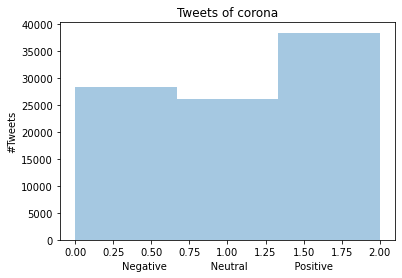

In [25]:
import seaborn as sns
sents =[]
for tw in data.Fully_cleaned_tweets:
    st = sentiment_analyzer_scores(tw)
    sents.append(st)
ax = sns.distplot(sents,kde=False,bins=3)
ax.set(xlabel='Negative              Neutral               Positive',ylabel='#Tweets',title="Tweets of corona")


# Emotion of the tweets

In [26]:
from collections import Counter

def con(sentence):
    emotion_list = []
    sentence = sentence.split(' ')
    with open('emotions.txt','r') as file:
        for line in file:
            clear_line = line.replace("\n", '').replace(",",'').replace("'",'').strip()
            word, emotion = clear_line.split(':')

            if word in sentence:
                emotion_list.append(emotion)
        w = Counter(emotion_list)
        return w
    

In [27]:
data['emotion'] = data['Fully_cleaned_tweets'].apply(lambda x: con(x) )

In [28]:
data.head(10)

,text,username,location,len,clean,sentiment,Fully_cleaned_tweets,emotion
0,RT @bennetowuonda: Kemri is now seeking Sh950 ...,RevoltKenya,"PARKLANDS, NAIROBI",92721,Kemri is now seeking Sh950 million to hire pe...,1,"kemri seeking sh950 million hire personnel, bu...",{}
1,Guidance for restarting RYA training activity ...,RYALondonSE,"East Berkshire, Kent, Middlesex, Surrey, Susse...",92721,Guidance for restarting RYA training activity ...,1,guidance restarting rya training activity - re...,{}
2,@realDonaldTrump Stop it now it's not the time...,JoyceAgossto,ohio,92721,Stop it now it's not the time for you to be f...,2,stop time focused anything except covid 19,{' focused': 1}
3,RT @SkyNewsBreak: Celtic have been declared ch...,bigandy68,Coatbridge Scotland,92721,Celtic have been declared champions as the Sc...,2,celtic declared champion scottish premier leag...,{}
4,"RT @Gnbgroup1: Madagascar Requests 170,000 Eur...",Eni_Omils,"Osun, Nigeria",92721,"Madagascar Requests 170,000 Euros From Fed. G...",1,"madagascar request 170,000 euro from fed. govt...",{}
5,RT @jeffphilips1: Hmmmmmmmm....now I’m feeling...,realmkoabiodun1,Lagos Nigeria,92721,Hmmmmmmmm....now I’m feeling I had COVID-19 d...,2,hmmmmmmmm....now i’m feeling i covid-19 day ag...,{}
6,@CDO_Scotland Aside from low prevalence - in m...,ewatersresearch,Aussieland,92721,Aside from low prevalence - in many novel inf...,0,"aside low prevalence - many novel infections, ...",{' sad': 2}
7,COVID -19 : Gov. Ganduje slashes salaries of ...,RealnewsMag,Nigeria,92721,COVID -19 : Gov. Ganduje slashes salaries of ...,0,covid -19 : gov. ganduje slash salary politica...,{}
8,RT @AdamJKucharski: Preliminary @cmmid_lshtm a...,DrChrisGibbons,"Sheffield, England",92721,Preliminary analysis using 111/999 data as a...,1,preliminary analysis using 111/999 data proxy ...,{}
9,RT @USEmbArgentina: ▶️You should find secure a...,bernies_bb1,Jose manuel estrada 186 ezeiza,92721,▶️You should find secure accommodation until ...,2,▶️you find secure accommodation able make way ...,{' fearless': 1}


In [29]:
emo=con(data['Fully_cleaned_tweets'].sum())

In [30]:
data['text'][8]

'RT @AdamJKucharski: Preliminary @cmmid_lshtm analysis using 111/999 data as a proxy to estimate changes in COVID-19 case trends. https://t.…'

# Plotting emotion bar graph

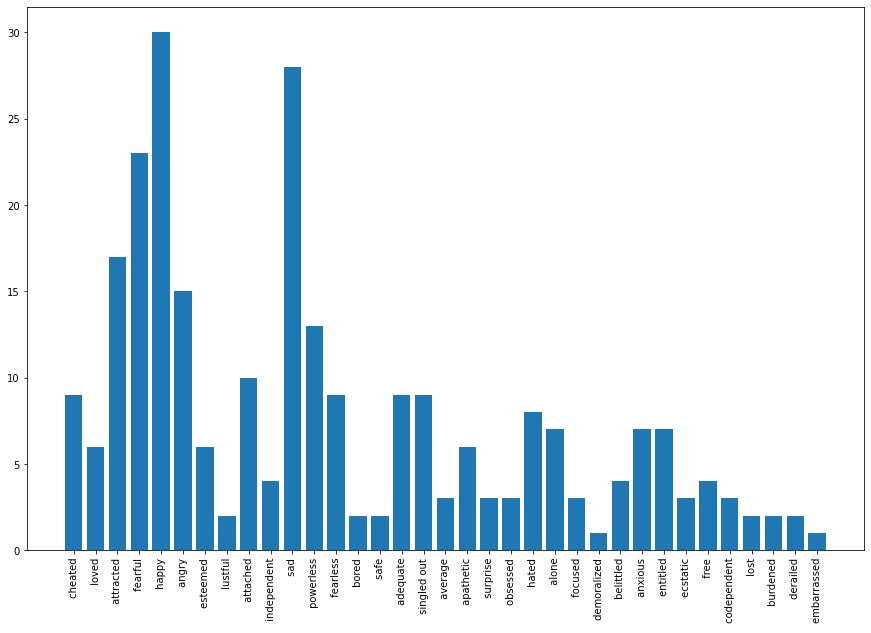

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.bar(emo.keys(),emo.values())
plt.xticks(rotation = 90)
plt.show()

# Wordcloud

In [33]:
from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator
import urllib
import requests
import matplotlib.pyplot as plt
def generate_wordcloud(all_words):
    Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
    image_colors = ImageColorGenerator(Mask)
    wc = WordCloud(background_color='black', height=750, width=2000,mask=Mask).generate(all_words)
    plt.figure(figsize=(10,20))
    plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
    plt.axis('off')
    plt.show()

# Wordcloud for Positive Sentiment

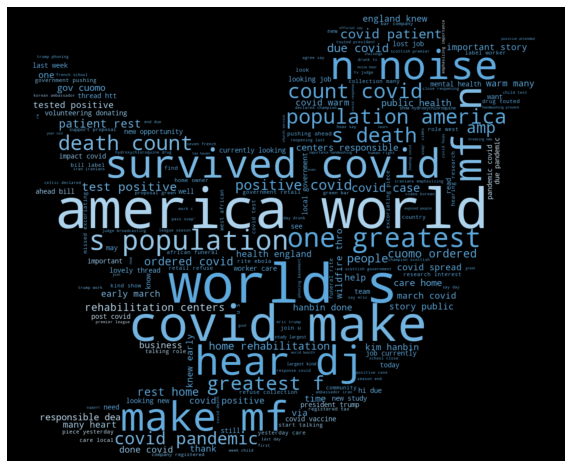

In [34]:
all_words = ' '.join([text for text in data['Fully_cleaned_tweets'][data.sentiment == 2]])
generate_wordcloud(all_words)

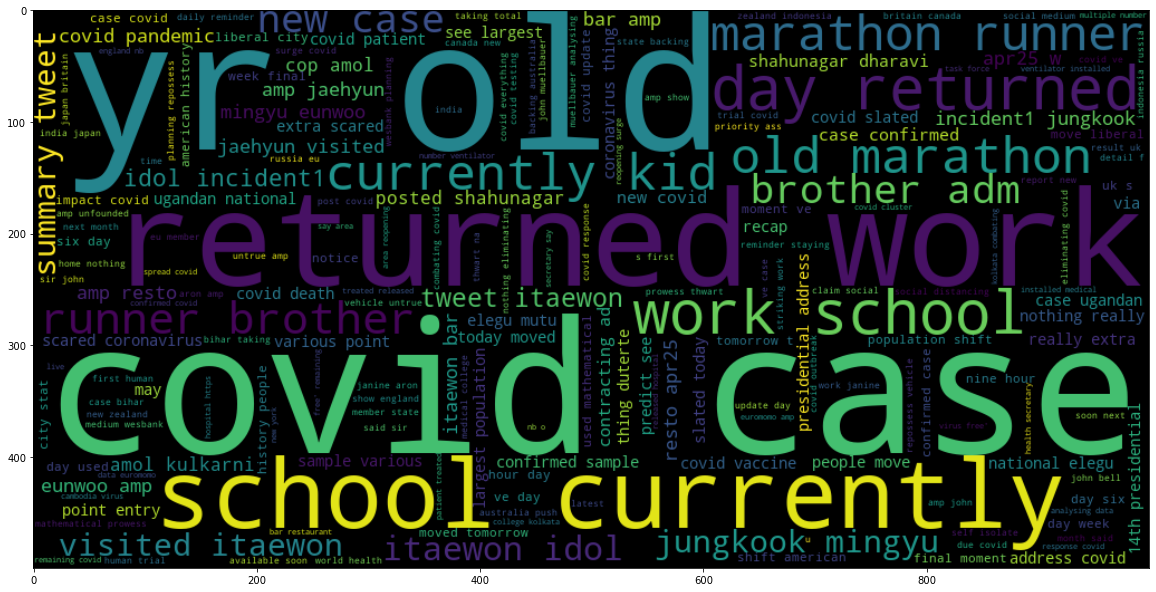

In [66]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 200 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data['Fully_cleaned_tweets'][data.sentiment == 1]))
plt.imshow(wc , interpolation = 'bilinear')

# Creating Hastag FreqDist

In [35]:
import nltk
                                                  #function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [36]:
hashtags = hashtag_extract(data['clean'])
hashtags = sum(hashtags, [])

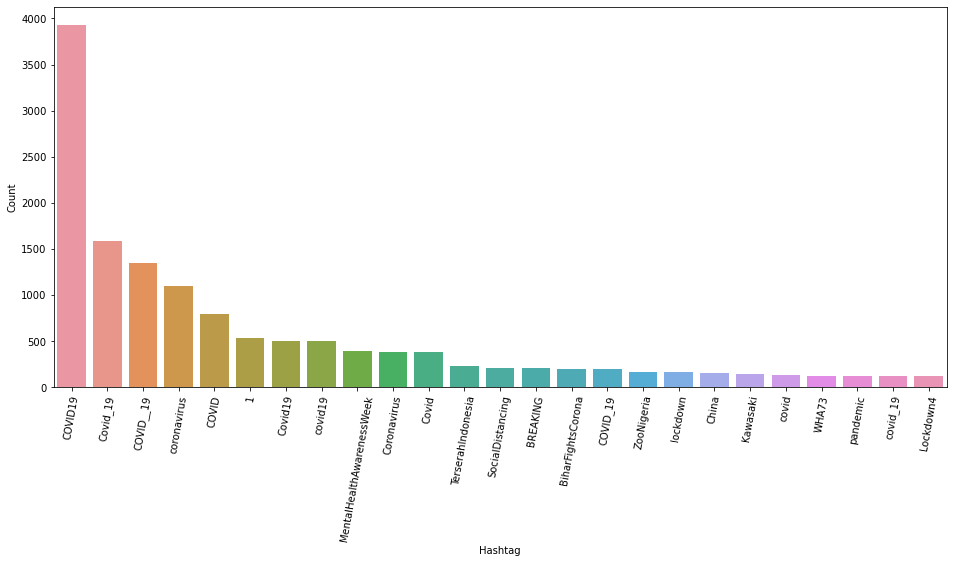

In [37]:
generate_hashtag_freqdist(hashtags)

# Tweets location bargraph

<AxesSubplot:>

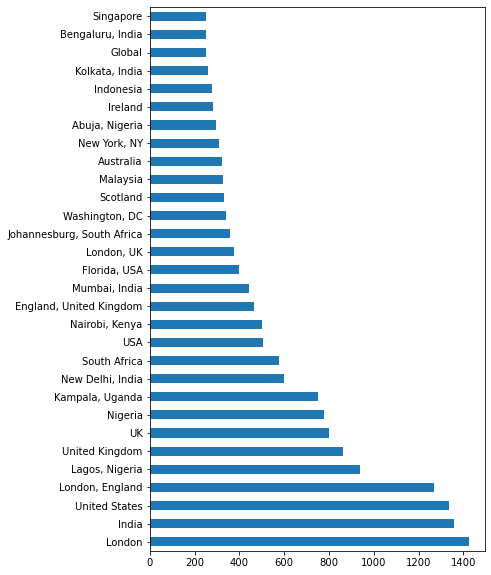

In [38]:
data['location'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

# n-gram Analysis

In [55]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(data.Fully_cleaned_tweets)
corpus[:5]

['kemri', 'seeking', 'sh950', 'million', 'hire']

In [56]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'covid-19': 38595,
 'the': 9506,
 '&amp;': 6998,
 'new': 6432,
 'case': 6016,
 'i': 5792,
 'for': 5084,
 'people': 5030,
 '-': 4979,
 'a': 4813}

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

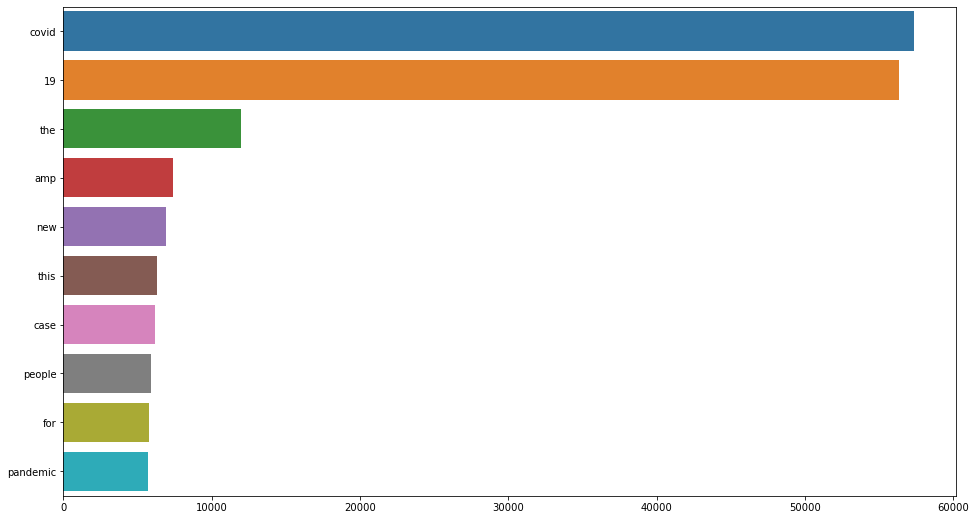

In [58]:
## Unigrams

plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(data.Fully_cleaned_tweets,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<AxesSubplot:>

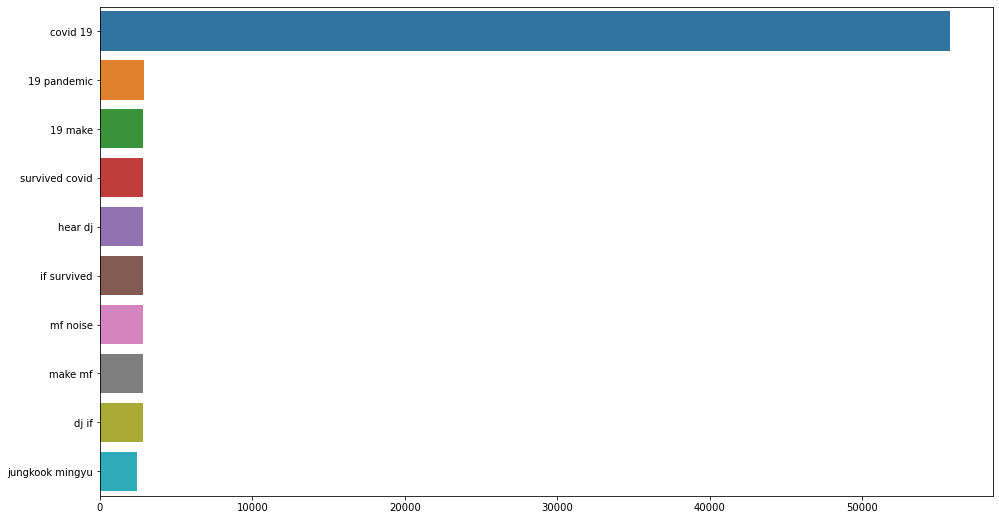

In [59]:
## Bi-grams

plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(data.Fully_cleaned_tweets,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

<AxesSubplot:>

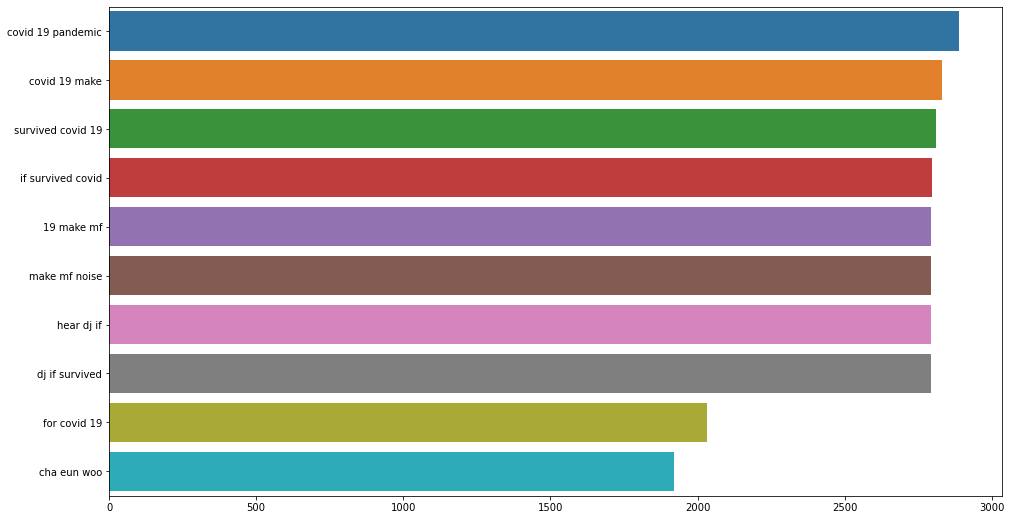

In [60]:
##tri-grams

plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(data.Fully_cleaned_tweets,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

# Extracting X and y from dataset

In [39]:
x = data.iloc[:,-2].values
y = data.iloc[:,-3].values

# Creating tfid vectorizer model

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
x = tfidf_word_vectorizer.fit_transform(x)

# Creating training and test data from the featureset and output label.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#  Create and training a Machine Learning model.

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

# Validate the model created.

In [43]:
predictions = classifier.predict(X_test.toarray())

# Predicting sentiment of manual input

In [44]:
file_name='TestTweet.csv'
test=pd.read_csv(file_name)  

In [47]:
test['clean']=clean_tweets(test['text']) 
test['clean']=test['clean'].replace("[^a-zA-Z ]", " ")

In [48]:
for i,tweet in enumerate(test['clean']):
    op=classifier.predict(tfidf_word_vectorizer.transform([tweet]).toarray())
    if op == [0]:
        print(i,")"," ' ",test.text[i]," ' ",'\n','=','NEGATIVE','\n')
    if op == [1]:
        print(i,")"," ' ",test.text[i]," ' ",'\n','=','NEUTRAL','\n')
    if op == [2]:
        print(i,")"," ' ",test.text[i]," ' ",'\n','=','POSITIVE','\n')

0 )  '  RT @djnicholl: Show us proof that Johnson is following science, MPs urge 

https://t.co/aN9ofVaQBV  '  
 = NEUTRAL 

1 )  '  Why people think 5G responsible for coronavirus https://t.co/jloVJuO0G0 via @YouTube  '  
 = NEGATIVE 

2 )  '  Yesterday I was walking along a pier of the #Amsterdam Oude Houthaven when an angry houseboat resident invited me leave as "they don't like walkers due to the #coronavirus" WTF...  '  
 = POSITIVE 

3 )  '  RT @WyeLea: The coronavirus crisis must not be allowed to delay Brexit https://t.co/4n6mip2MVg  '  
 = NEGATIVE 

4 )  '  #N4P #C4XD #IQAI 
Coronavirus: Moderna’s US vaccine first trials show immune response https://t.co/2vy25EMqEY  '  
 = POSITIVE 

5 )  '  @HeshmatAlavi China knew what they were doing as soon as President Trump signed those papers. China will fulfill their deal as long as no pandemic happens. TWO days later &amp; here is Coronavirus knocking at our doors! Sue them, I say.  '  
 = NEUTRAL 

6 )  '  RT @jonworth: Even by Brex

53 )  '  RT @washingtonpost: Opinion: Trump is using the coronavirus as a cover to abuse his authority https://t.co/BM331nIelg  '  
 = NEGATIVE 

54 )  '  One restaurant in New Jersey is turning back the clock and transforming into an old-style carhop from the 1950s and 60s amid the coronavirus. https://t.co/PgsO05h19D  '  
 = NEUTRAL 

55 )  '  RT @nickybligh: What a great initiative for young actors.  https://t.co/9dNPVLgVza  '  
 = POSITIVE 

56 )  '  BBC News - Coronavirus: When did care homes go into lockdown? https://t.co/p71bwkfZ1W  '  
 = POSITIVE 

57 )  '  @GordonGChang @TheresaAFallon @POTUS #coronavirus China gave its backing to an investigation into the origins of the coronavirus but insisted on it being carried out by the World Health Organisation, setting up a clash with the United States, which has lost patience with the body? ¥ Bribery!!!! https://t.co/6sPqKk2XH8  '  
 = NEGATIVE 

58 )  '  RT @msnuk: France sees flare-up of 70 new coronavirus cases after schools reope

109 )  '  https://t.co/DG3hrNNIXF - UK unemployment surges to 1.35 million – expert expects very quick rise to over 10%  '  
 = NEGATIVE 

110 )  '  @hezedgodson @RKRadhakrishn @kv_ramanan @ramyakannan yep, as if they had a telepathy with #coronavirus. d dumbo who said #TamilNadu wud be corona free in 3days n its d disease of d rich is d CM. we stand helpless. we’ve a great duty ahead, we cant simply sit n watch. we #millennials shd form a political movement aiming for CM chair  '  
 = POSITIVE 

111 )  '  RT @washingtonpost: Opinion: Trump is using the coronavirus as a cover to abuse his authority https://t.co/BM331nIelg  '  
 = NEGATIVE 

112 )  '  RT @Peston: Why didn't the government protect us earlier from coronavirus? https://t.co/RslSSTYnvp  '  
 = POSITIVE 

113 )  '  RT @Independent: France sees 70 coronavirus cases linked to schools days after reopening https://t.co/7IjRBagAZw  '  
 = NEUTRAL 

114 )  '  Still sharing #TaiwanModel even though we got no #WHA73 invitation this 

166 )  '  Hmmm...
California churchgoer tests positive for coronavirus one day after service; 180 exposed https://t.co/pKgxIFJOtp via @nbcnews  '  
 = POSITIVE 

167 )  '  RT @brawday: PM lining up civil servants to take blame for coronavirus response https://t.co/G1c2EjIqyn  '  
 = NEUTRAL 

168 )  '  RT @dsue1441_re: Robert De Niro calls trump a "lunatic" who "doesn't care" how many people die from coronavirus https://t.co/LBDu2ujeYF  '  
 = NEGATIVE 

169 )  '  RT @washingtonpost: Opinion: Trump is using the coronavirus as a cover to abuse his authority https://t.co/BM331nIelg  '  
 = NEGATIVE 

170 )  '  RT @piersmorgan: Shameless &amp; shameful. The only thing this Govt threw around care homes was the coronavirus. https://t.co/eDSZyjNGbb  '  
 = POSITIVE 

171 )  '  The latest HUB News Daily! https://t.co/GVEQCoHTIp #coronavirus #sme  '  
 = NEUTRAL 

172 )  '  RT @i_theindian: Zee News: Noida's most deadly coronavirus hotspot.

#ZeeNewsSealKaro https://t.co/EQguBVKH0X  '  
 = NEU

217 )  '  RT @washingtonpost: Opinion: Trump is using the coronavirus as a cover to abuse his authority https://t.co/BM331nIelg  '  
 = NEGATIVE 

218 )  '  RT @NTynesideNASUWT: Gavin Williamson under fire over free school meal cuts during coronavirus outbreak https://t.co/7vJSNHqsO7  '  
 = POSITIVE 

219 )  '  RT @washingtonpost: Opinion: Trump is using the coronavirus as a cover to abuse his authority https://t.co/BM331nIelg  '  
 = NEGATIVE 

220 )  '  RT @LeVostreGC: Sorrye to share bad newes, but thys ys bad newes. Ther must be some waye to helpe.
https://t.co/BN843mdMLo  '  
 = POSITIVE 

221 )  '  Do not #self-diagnose . It gives you a false sense of #Security 
#coronavirus https://t.co/eroFAlJddY  '  
 = POSITIVE 

222 )  '  Wolves extend 33-year-old English goalkeeper John Ruddy's contract by a further year. (Birmingham Mail)

Watford's English striker Troy Deeney fear Premier League players will face a public backlash over mass testing for coronavirus. (Good Morning Britain 

In [49]:
tweet="@briantylercohen Hey #Insane @realDonaldTrump ! Are you crazy? ANY of them don't need to die at all."
clean=clean_tweets(tweet)
clean=str(clean)
clean=re.sub('[^a-zA-Z]', ' ',clean )
clean=[clean]
op=classifier.predict(tfidf_word_vectorizer.transform(clean).toarray())
if op == [0]:
    print(tweet,'\n','=','NEGATIVE','\n')
if op == [1]:
    print(tweet,'\n','=','NEUTRAL','\n')
if op == [2]:
    print(tweet,'\n','=','POSITIVE','\n')

@briantylercohen Hey #Insane @realDonaldTrump ! Are you crazy? ANY of them don't need to die at all. 
 = NEGATIVE 



# Evaluate the model

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy score : ',accuracy_score(y_test, predictions)*100,'\n')

Accuracy score :  91.19439201941223 



In [51]:
print(confusion_matrix(y_test,predictions),'\n')

[[5080  388  326]
 [ 103 4969  181]
 [ 210  425 6863]] 



In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5794
           1       0.86      0.95      0.90      5253
           2       0.93      0.92      0.92      7498

    accuracy                           0.91     18545
   macro avg       0.91      0.91      0.91     18545
weighted avg       0.91      0.91      0.91     18545

